# 1. Pre-processing 
At this stage training dataset was:
- anaysed;
- balanced;
- saved as a separate "csv" file.

In [1]:
import pandas as pd
filename = 'datatraining.txt'
data = pd.read_csv(filename)

In [2]:
pd.set_option('display.max_columns', None) #change options to see all columns

In [3]:
data.head(4)

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
1,2015-02-04 17:51:00,23.18,27.2720,426.0,721.25,0.004793,1
2,2015-02-04 17:51:59,23.15,27.2675,429.5,714.00,0.004783,1
3,2015-02-04 17:53:00,23.15,27.2450,426.0,713.50,0.004779,1
4,2015-02-04 17:54:00,23.15,27.2000,426.0,708.25,0.004772,1


In [4]:
data.describe()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
count,8143.000000,8143.000000,8143.000000,8143.000000,8143.000000,8143.000000
mean,20.619084,25.731507,119.519375,606.546243,0.003863,0.212330
std,1.016916,5.531211,194.755805,314.320877,0.000852,0.408982
min,19.000000,16.745000,0.000000,412.750000,0.002674,0.000000
25%,19.700000,20.200000,0.000000,439.000000,0.003078,0.000000
50%,20.390000,26.222500,0.000000,453.500000,0.003801,0.000000
75%,21.390000,30.533333,256.375000,638.833333,0.004352,0.000000
max,23.180000,39.117500,1546.333333,2028.500000,0.006476,1.000000


In [5]:
data['Occupancy'].value_counts()   # check if the dataset is balanced, counting items

0    6414
1    1729
Name: Occupancy, dtype: int64

In [6]:
#Get indices for class 0
Index_label_0 = data[data['Occupancy']==0].index.tolist() 
Index_label_1 = data[data['Occupancy']==1].index.tolist() 

In [7]:
#Considering python indices start with 0 I need to subtract 1 from all values obtained in previous step
Index_0=[x-1 for x in Index_label_0]
Index_1=[x-1 for x in Index_label_1]

In [8]:
import random

random.seed(2)
sample0=random.sample(Index_0,1729) # Sample 1729 items for class 0 (to be equal to class 1)

In [9]:
balanced_data=data.iloc[sample0+Index_1] 

In [10]:
balanced_data['Occupancy'].value_counts()   # check if the dataset is balanced, counting items

1    1729
0    1729
Name: Occupancy, dtype: int64

In [11]:
#Converto pandas dataframe to csv
balanced_data.to_csv("balanced_train.csv", encoding='utf-8', index=False)

# 2. Feature selection
Here newly created training dataset was read and feature selection performed.

In [1]:
import pandas as pd
import numpy as np

filename1 = 'balanced_train.csv'
data1 = pd.read_csv(filename1)
data1.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
0,2015-02-05 01:50:00,21.20,25.100,0.0,447.5,0.003905,0
1,2015-02-05 06:36:59,20.89,23.000,0.0,449.0,0.003508,0
2,2015-02-05 05:42:00,20.89,23.500,0.0,442.5,0.003585,0
3,2015-02-07 14:09:00,22.60,17.175,142.5,443.0,0.002905,0
4,2015-02-06 02:10:59,20.55,19.600,0.0,433.0,0.002925,0


In [2]:
data_without_date=data1[data1.columns[1:]]

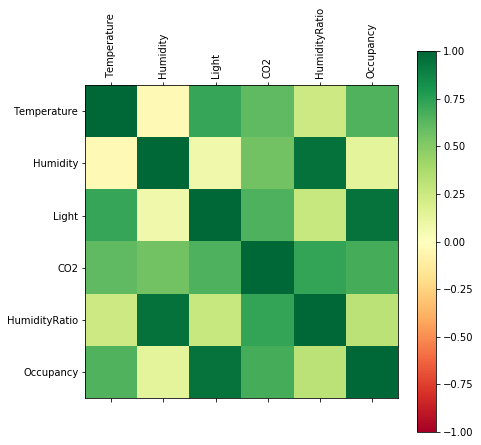

In [4]:
import numpy as np
from matplotlib import pyplot
from matplotlib import cm

correlations = data_without_date.corr()
# plot correlation matrix
fig = pyplot.figure(figsize=(7, 7))
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, cmap='RdYlGn', vmin=-1, vmax=1) 
fig.colorbar(cax)
ticks = np.arange(0,len(data_without_date.columns),1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(data_without_date.columns,rotation='vertical')
ax.set_yticklabels(data_without_date.columns)
pyplot.show()

In [5]:
import sys
from os.path import dirname
sys.path.append('...Local/Programs/Python/Python38-32/Lib/site-packages')

In [6]:
# Distinguish attribute columns and class column.
X_train=data1[data1.columns[1:-1]]
y_train=data1['Occupancy']

In [7]:
print(np.shape(X_train))
print(np.shape(y_train))

(3458, 5)
(3458,)


In [8]:
#Read test dataset
filename2 = 'datatest.txt'
data2 = pd.read_csv(filename2)

In [9]:
data2['Occupancy'].value_counts() #Test data is unbalanced   

0    1693
1     972
Name: Occupancy, dtype: int64

In [10]:
X_test=data2[data2.columns[1:-1]]
y_test=data2['Occupancy']

In [11]:
#Feature selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

def best_features(scores,N):
    scores_desc=scores.sort_values(na_position='first')[::-1]
    features=[]
    for i in range(N):
        features.append(scores_desc.index[i])
    return features #algorithm sort all features in descending order from most to least important

In [12]:
from numpy import set_printoptions

#Univariate FS - Filter method.
filter_fs = SelectKBest(score_func=chi2, k=4) 
fit1 = filter_fs.fit(X_train, y_train)
# summarize scores
set_printoptions(precision=4)
scores1=pd.Series(fit1.scores_)

features_filter=best_features(scores1,4)
print('features_filter',features_filter)

features_filter [2, 3, 1, 0]


In [13]:
X_train.columns[features_filter]

Index(['Light', 'CO2', 'Humidity', 'Temperature'], dtype='object')

In [14]:
#Make reduced dataset according to selected features
X_train_new=X_train.iloc[:,[0,1,2,3]]
X_test_new=X_test.iloc[:,[0,1,2,3]]

# 3. WAME optimization algorithm

In [15]:
#WAME optimization algorithm for weight updates 
from keras.optimizers import Optimizer # import baseline optimizer
from keras import backend as K
from tensorflow import set_random_seed

class WAME(Optimizer):
    set_random_seed(2)
    def __init__(self, lr=0.001, epsilon=1e-8, eta_plus = 1.2, eta_minus = 0.1,
                 eta_min=0.01, eta_max=100, decay = 0.9,
                 **kwargs):
        super(WAME, self).__init__(**kwargs)
        self.__dict__.update(locals())
        self.iterations = K.variable(0)
        self.lr = K.variable(lr)
        self.decay = K.variable(decay)
        self.eta_plus = K.variable(eta_plus)
        self.eta_minus = K.variable(eta_minus)
        self.eta_min = eta_min
        self.eta_max = eta_max

    def get_updates(self, params, loss):
        grads = self.get_gradients(loss, params)
        self.updates = [K.update_add(self.iterations, 1)]
        
        lr = self.lr
        
        #Lines 26-31 below are tensor initialisation
        shapes = [K.get_variable_shape(p) for p in params]
        prev_grads = [K.zeros(shape) for shape in shapes]
        prev_param = [K.zeros(shape) for shape in shapes]
        tetas = [K.zeros(shape) for shape in shapes]
        accels = [K.ones(shape) for shape in shapes]
        zetas = [K.ones(shape) for shape in shapes]

        for p, g, teta, a, z, pg, pp in zip(params, grads, tetas, accels,
                zetas, prev_grads, prev_param): # Line 3 in algorithm (see report)

            change = pg * g
            change_below_zero = K.less(change,0.)
            change_above_zero = K.greater(change,0.)
            
            #Lines 43-48 here are implementation of the equations 4-7 in algorithm (see report)
            a_new = K.switch(
                change_below_zero,
                a * self.eta_minus,
                K.switch(change_above_zero, a * self.eta_plus, a)
            )
            a_clipped = K.clip(a_new, self.eta_min, self.eta_max) 
            
            z_new = (self.decay * z) + (1. - self.decay) * a_clipped #Equation 9 in algorithm (see report)
            teta_new = (self.decay * teta) + (1. - self.decay) * K.square(g) #Equation 10 in algorithm (see report)
            new_p = p - lr * g / (K.sqrt(z_new*teta_new) + self.epsilon) #Equation 11 and 12 in algorithm (see report)  

            self.updates.append(K.update(teta, teta_new))
            self.updates.append(K.update(p, new_p)) 
            self.updates.append(K.update(pg, p))
            self.updates.append(K.update(a, a_new))
            self.updates.append(K.update(z, z_new))
        return self.updates

    def get_config(self):
        config = {'lr': float(K.get_value(self.lr)),
                  'beta_a': float(K.get_value(self.beta_a)),
                  'eta_plus': float(K.get_value(self.eta_plus)),
                  'eta_minus': float(K.get_value(self.eta_minus)),
                  'eta_min': float(self.eta_min),
                  'eta_max': float(self.eta_max),
                  'epsilon': self.epsilon}
        base_config = super(WAME, self).get_config()
        return dict(list(base_config.items()) + list(config.items()))

Using TensorFlow backend.


# 4. Building neural network model 

In [16]:
#Libraries to build ANN model
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from keras.models import Sequential
from keras.layers import Dense, Dropout
np.random.seed(7)

In [17]:
from keras.utils import to_categorical 

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

count_classes = y_test.shape[1]
print(count_classes)

2


In [18]:
#Build model without dropout
model = Sequential()
model.add(Dense(10, activation='relu', input_dim=4))
model.add(Dense(20, activation='relu'))
model.add(Dense(2, activation='softmax'))

# Compile the model
model.compile(optimizer=WAME(), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [19]:
# train the model - it produces poor result stucking in local minima
model.fit(X_train_new, y_train, epochs=20)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Epoch 1/20
3458/3458 [==============================] - 5s 1ms/step - loss: 8.0590 - acc: 0.5000
Epoch 2/20
3458/3458 [==============================] - 0s 80us/step - loss: 8.0590 - acc: 0.5000
Epoch 3/20
3458/3458 [==============================] - 0s 84us/step - loss: 8.0590 - acc: 0.5000
Epoch 4/20
3458/3458 [==============================] - 0s 87us/step - loss: 8.0590 - acc: 0.5000
Epoch 5/20
3458/3458 [==============================] - 0s 75us/step - loss: 8.0590 - acc: 0.5000
Epoch 6/20
3458/3458 [==============================] - 0s 72us/step - loss: 8.0590 - acc: 0.5000
Epoch 7/20
3458/3458 [==============================] - 0s 73us/step - loss: 8.0590 - acc: 0.5000
Epoch 8/20
3458/3458 [==============================] - 0s 77us/step - loss: 8.0590 - acc: 0.5000
Epoch 9/20
3458/3458 [==============================] - 0s 86us/step - loss: 8.0590 - acc: 0.5000
Epoch 10/20
3458/3458 [=

In [20]:
#Build model with dropout 
model = Sequential()
model.add(Dense(15, activation='relu', input_dim=4))#input_dim=4 beause I removed 1 column
model.add(Dropout(0.2,seed=2))
model.add(Dense(20, activation='relu'))
model.add(Dense(2, activation='softmax'))

# Compile the model
model.compile(optimizer=WAME(), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [21]:
# train the model - it performs much better
model_info=model.fit(X_train_new, y_train, validation_split=0.3, epochs=20, batch_size=32)

Train on 2420 samples, validate on 1038 samples
Epoch 1/20
2420/2420 [==============================] - 2s 795us/step - loss: 3.8787 - acc: 0.7455 - val_loss: 2.7630 - val_acc: 0.8256
Epoch 2/20
2420/2420 [==============================] - 0s 106us/step - loss: 1.4684 - acc: 0.9041 - val_loss: 4.4600 - val_acc: 0.7158
Epoch 3/20
2420/2420 [==============================] - 0s 108us/step - loss: 3.6070 - acc: 0.7748 - val_loss: 16.1181 - val_acc: 0.0000e+00
Epoch 4/20
2420/2420 [==============================] - 0s 90us/step - loss: 3.3947 - acc: 0.7872 - val_loss: 2.9037 - val_acc: 0.8198
Epoch 5/20
2420/2420 [==============================] - 0s 110us/step - loss: 1.2216 - acc: 0.9236 - val_loss: 14.4150 - val_acc: 0.1021
Epoch 6/20
2420/2420 [==============================] - 0s 104us/step - loss: 1.4624 - acc: 0.9079 - val_loss: 5.9673 - val_acc: 0.6262
Epoch 7/20
2420/2420 [==============================] - 0s 104us/step - loss: 1.3228 - acc: 0.9149 - val_loss: 8.0097 - val_acc: 0.

In [22]:
#Creating function to plot accuracy during the learning process
#Code taken from https://github.com/parneetk/Neural-Networks-in-Keras/blob/master/01_neural_networks.ipynb
import matplotlib.pyplot as plt

def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [23]:
#Obtain weights at the end of training process
print(model.layers[0].get_weights())

[array([[-0.3081, -0.0339, -0.1345,  0.6762, -0.3645, -1.0954,  0.1262,
        -0.0853, -0.5391, -0.2529, -0.3184, -0.1172,  0.0507,  0.1879,
        -0.9129],
       [ 0.2675, -0.0259,  0.4774,  0.7369,  0.4614, -0.6265,  0.4685,
        -0.4569, -0.5139, -0.3168, -0.4155, -0.5539,  0.0919,  0.3501,
        -0.8066],
       [-0.5469,  0.4359, -0.3839, -0.5311,  0.1855,  0.2155, -0.5836,
         0.2254,  0.105 , -0.2257, -0.5116,  0.5516, -0.5577, -0.8266,
         0.3231],
       [-0.3406, -0.3936,  0.1393,  0.2294, -0.386 ,  0.0623,  0.2153,
        -0.5468,  0.2742, -0.5176, -0.1062, -0.1224,  0.2447,  0.3157,
         0.2579]], dtype=float32), array([ 0.    , -0.1218,  0.2567,  0.284 ,  0.    , -0.5856,  0.3451,
        0.    , -0.3545,  0.    ,  0.    , -0.1825,  0.2862,  0.1356,
       -0.4655], dtype=float32)]


In [24]:
pred_test= model.predict(X_test_new)
scores = model.evaluate(X_test_new, y_test, verbose=0)
print('Accuracy on test data: {}% \n Error on test data: {}'.format(scores[1], 1 - scores[1]))  

Accuracy on test data: 0.9196998123827392% 
 Error on test data: 0.08030018761726077


In [25]:
#Function to work with binary output
def convert(alist):
    ind=[]
    for i in alist:
        if i[0]==1:
            ind.append(0)
        else:
            ind.append(1)
    return ind

prediction=convert(pred_test)
target=convert(y_test)

In [26]:
from sklearn.metrics import confusion_matrix

matrix = confusion_matrix(target,prediction)
print(matrix)

[[1639   54]
 [ 158  814]]


In [27]:
from sklearn.metrics import accuracy_score, recall_score, f1_score

accuracy=accuracy_score(target,prediction)
recall=recall_score(target,prediction)
f1=f1_score(target,prediction)

print('accuracy',accuracy)
print('recall',recall)
print('f1',f1)

accuracy 0.9204502814258911
recall 0.8374485596707819
f1 0.8847826086956522


 # 4.1. Choosing number of nodes in hidden layer 

In [28]:
#Create function to build a model depends on number of hidden layers
from tensorflow import set_random_seed

def ANN(hidden):
    set_random_seed(2)
    model = Sequential()
    model.add(Dense(15, activation='relu', input_dim=4))
    model.add(Dropout(0.2,seed=2))
    model.add(Dense(hidden, activation='relu')) #here the value of hidden layers can be changed
    model.add(Dense(2, activation='softmax'))
    # Compile the model
    model.compile(optimizer=WAME(), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])
    return model

In [29]:
def trainpredict(model): #function to train certain model and make prediction 
    model.fit(X_train_new, y_train, epochs=20,verbose=0,batch_size=32)
    pred_test= model.predict(X_test_new)
    scores = model.evaluate(X_test_new, y_test, verbose=0)
    return scores[1]

def run_model(hidden_nodes):#function to run ANN with different number of hidden nodes
    arch={} #Create dictionary to store results of model`s performance
    for i in hidden_nodes:
        model=ANN(i)
        mod_results=[]
        for j in range(10):
            res=trainpredict(model)
            mod_results.append(round(res,4))
        arch[i]=mod_results
    return arch

In [30]:
#Run model for various numbers of hidden nodes
mod_5_10_15_20_25=run_model([5,10,15,20,25])

In [31]:
print(mod_5_10_15_20_25)

{5: [0.9786, 0.9782, 0.9782, 0.9782, 0.9764, 0.9707, 0.9786, 0.9786, 0.9782, 0.9786], 10: [0.9704, 0.9722, 0.9779, 0.9786, 0.9782, 0.979, 0.9786, 0.9782, 0.9782, 0.9786], 15: [0.9756, 0.9782, 0.9771, 0.9711, 0.9779, 0.9756, 0.9779, 0.9779, 0.976, 0.9764], 20: [0.9782, 0.9711, 0.9704, 0.9782, 0.979, 0.9786, 0.979, 0.9782, 0.9786, 0.9786], 25: [0.9707, 0.9782, 0.9782, 0.9741, 0.9782, 0.9737, 0.9786, 0.9782, 0.9786, 0.9786]}


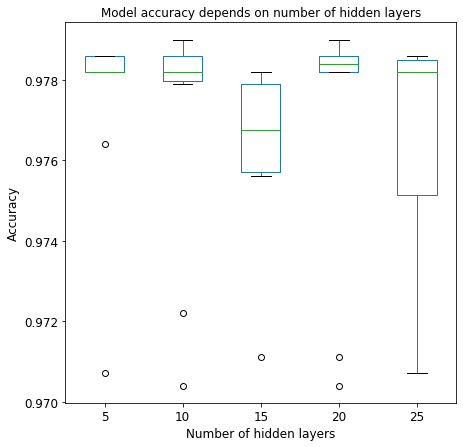

In [32]:
import matplotlib.pyplot as plt

df = pd.DataFrame(mod_5_10_15_20_25)
plt.figure(figsize=(7,7))
plt.xlabel('Number of hidden layers',fontsize=12)
plt.ylabel('Accuracy',fontsize=12)
plt.title('Model accuracy depends on number of hidden layers',fontsize=12)
boxplot = df.boxplot(grid=False, fontsize=12) 

 # 4.2. Evaluating model on test dataset 1 

In [33]:
#Model structure 15-20-2
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

final_model=ANN(20)
epochs=[20,30,40,50,60,70,80,90,100,110,120,130,140]

def evaluation(model, X_test, y_test, epochs): #function to train certain model and make prediction 
    model_info=model.fit(X_train_new, y_train, epochs=epochs,validation_split=0.3, verbose=0, batch_size=32)
    pred_test= model.predict(X_test)
    prediction=convert(pred_test)
    target=convert(y_test)
    accuracy=accuracy_score(target,prediction)
    precision = precision_score(target,prediction)
    recall=recall_score(target,prediction)
    f1=f1_score(target,prediction)
    return accuracy, precision, recall, f1, model_info # function returns 4 main metrics, as well as saved model

In [34]:
mod_evaluation_1=[] #make list to store results
for i in epochs:
    res=evaluation(final_model, X_test_new, y_test,i)
    mod_evaluation_1.append(res) #append tuple with results to a list

In [35]:
accuracy_1=[]
precision_1=[]
recall_1=[]
f1_1=[]
for item in mod_evaluation_1:
    accuracy_1.append(item[0])
    precision_1.append(item[1])
    recall_1.append(item[2])
    f1_1.append(item[3])

print('accuracy',accuracy_1)
print('precision',precision_1)
print('recall',recall_1)
print('f1',f1_1)

accuracy [0.9159474671669794, 0.9789868667917448, 0.9789868667917448, 0.9789868667917448, 0.9789868667917448, 0.9789868667917448, 0.9767354596622889, 0.9774859287054409, 0.9786116322701689, 0.9786116322701689, 0.9782363977485928, 0.9771106941838649, 0.9774859287054409]
precision [0.9369158878504673, 0.9455252918287937, 0.9455252918287937, 0.9455252918287937, 0.9455252918287937, 0.9455252918287937, 0.9408914728682171, 0.9453125, 0.9463414634146341, 0.9454722492697176, 0.9462890625, 0.9461312438785504, 0.9461839530332681]
recall [0.8251028806584362, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9989711934156379, 0.9958847736625515, 0.9979423868312757, 0.9989711934156379, 0.9969135802469136, 0.9938271604938271, 0.9948559670781894]
f1 [0.8774617067833699, 0.972, 0.972, 0.972, 0.972, 0.972, 0.9690618762475051, 0.969939879759519, 0.971457185778668, 0.9714857428714357, 0.9709418837675351, 0.9693928750627194, 0.9699097291875627]


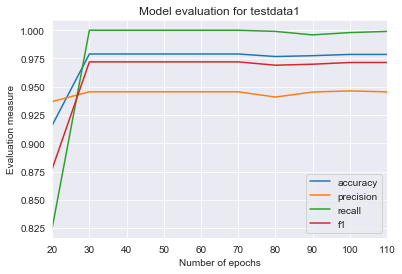

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("darkgrid")
axes = plt.gca()
axes.set_xlim([20,110])
plt.xlabel('Number of epochs')
plt.ylabel('Evaluation measure')
plt.title('Model evaluation for testdata1')
plt.plot(epochs,accuracy_1)
plt.plot(epochs,precision_1)
plt.plot(epochs,recall_1)
plt.plot(epochs,f1_1)
plt.legend(['accuracy','precision','recall','f1'], loc='best')
plt.show()

In [37]:
#Take best model for 110 epochs
best_mod1=mod_evaluation_1[8][4]

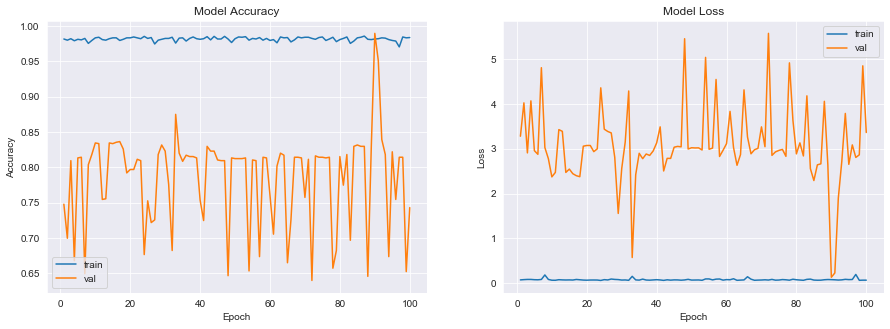

In [38]:
plot_model_history(best_mod1)

 # 4.3. Evaluating model on test dataset 2

In [39]:
#Read second test dataset
filename3 = 'datatest2.txt'
data3 = pd.read_csv(filename3)
data3['Occupancy'].value_counts() 
X_test_1=data3[data3.columns[1:-1]]
y_test_1=data3['Occupancy']
X_test_new1=X_test_1.iloc[:,[0,1,2,3]]

In [40]:
#This dataset is also unbalanced
data3['Occupancy'].value_counts()

0    7703
1    2049
Name: Occupancy, dtype: int64

In [41]:
y_test_1 = to_categorical(y_test_1)

In [42]:
mod_evaluation_2=[] #make list to store results
for i in epochs:
    res=evaluation(final_model, X_test_new1, y_test_1, i)
    mod_evaluation_2.append(res) #append tuple with results to a list

In [43]:
accuracy_2=[]
precision_2=[]
recall_2=[]
f1_2=[]
for item in mod_evaluation_2:
    accuracy_2.append(item[0])
    precision_2.append(item[1])
    recall_2.append(item[2])
    f1_2.append(item[3])

print('accuracy',accuracy_2)
print('precision',precision_2)
print('recall',recall_2)
print('f1',f1_2)

accuracy [0.9914889253486464, 0.9771328958162429, 0.9746718621821165, 0.9806193601312552, 0.9723133716160788, 0.9748769483182936, 0.9859515996718622, 0.985746513535685, 0.9830803937653815, 0.9764150943396226, 0.9754922067268252, 0.9877973748974569, 0.9762100082034455]
precision [0.9658767772511848, 0.9199632014719411, 0.9065884476534296, 0.918918918918919, 0.8990578734858681, 0.9088848594741614, 0.9672531769305963, 0.9640427599611273, 0.9644970414201184, 0.9572649572649573, 0.9693983402489627, 0.9670861568247822, 0.9699948266942576]
recall [0.9946315275744265, 0.9760858955588092, 0.9804782820888238, 0.9956076134699854, 0.9780380673499268, 0.9785261102977062, 0.9658369936554417, 0.9682772083943387, 0.9546120058565154, 0.9292337725719864, 0.9121522693997072, 0.9751098096632503, 0.9150805270863837]
f1 [0.9800432796345275, 0.9471939379587971, 0.9420867526377491, 0.9557273366127899, 0.9368863955119215, 0.9424206815511162, 0.9665445665445666, 0.9661553445337229, 0.9595290654893304, 0.9430411

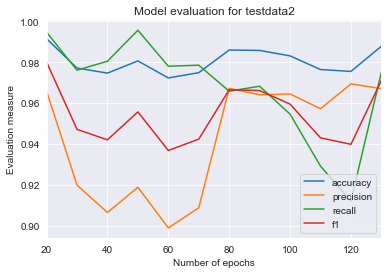

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("darkgrid")
axes = plt.gca()
axes.set_xlim([20,130])
plt.xlabel('Number of epochs')
plt.ylabel('Evaluation measure')
plt.title('Model evaluation for testdata2')
plt.plot(epochs,accuracy_2)
plt.plot(epochs,precision_2)
plt.plot(epochs,recall_2)
plt.plot(epochs,f1_2)
plt.legend(['accuracy','precision','recall','f1'], loc='best')
plt.show()

In [46]:
#Take best model for 130 epochs
best_mod2=mod_evaluation_2[11][4]

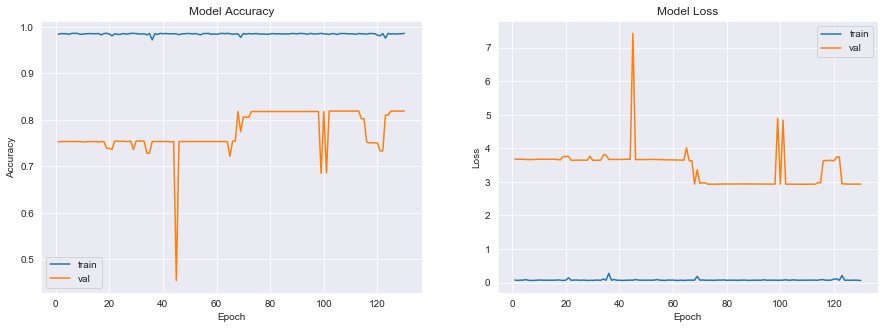

In [47]:
plot_model_history(best_mod2)